EDA Walidacja  
Odnosił się będę do konkretnych nr komórek (In[nr_komórki]):
- ploty z komórki 9 to ten sam plot co w komórce 19 (wiem, że miało to pokazać różnice między danymi zlogarytmowaniymi i nie zlogarytmowaniymi, ale nie trzeba pokazywać raczej tego osobno na 3 rodzajach plotów: histogram, box i violin, także bym zostawił tylko ten histogram ten z pokazaną gęstością by to pokazać (komórki 16, 17).
- plot z komórki 13 - na podstawie tego co nam mówili na twd ogólnie lepiej jest słupków w barplototach nie dawać w różnych kolorach, bo kolor nie daje już żadnej informacji na tym plocie (już jest oznaczony jaki to ród/tytuł itp na osi y)
- to samo w komórce 23
- w komórkach 22 i 23 zlewa wam się (w niektórych miejscach) oznaczenie osi x, poza tym nie da się jasno określić, które oznaczenie przynależy do którego słupka. Pokażę, poniżej jak to naprawić

   
- brakuje informacji o outlierach (chyba ze sa pokazane na jakis wykresach i ja tego nie widze, ale w takim razie przydalyby sie to jaśniej zaznaczyć - jakies komentarze dodac)
- moglibyscie zapisac ile macie zmiennych kategorycznych i ilosciowych
- usunelabym zmienna name - wszystkei wartosci sa unikalne wiec nie wnosza raczej zadnej informacji

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling.csv')

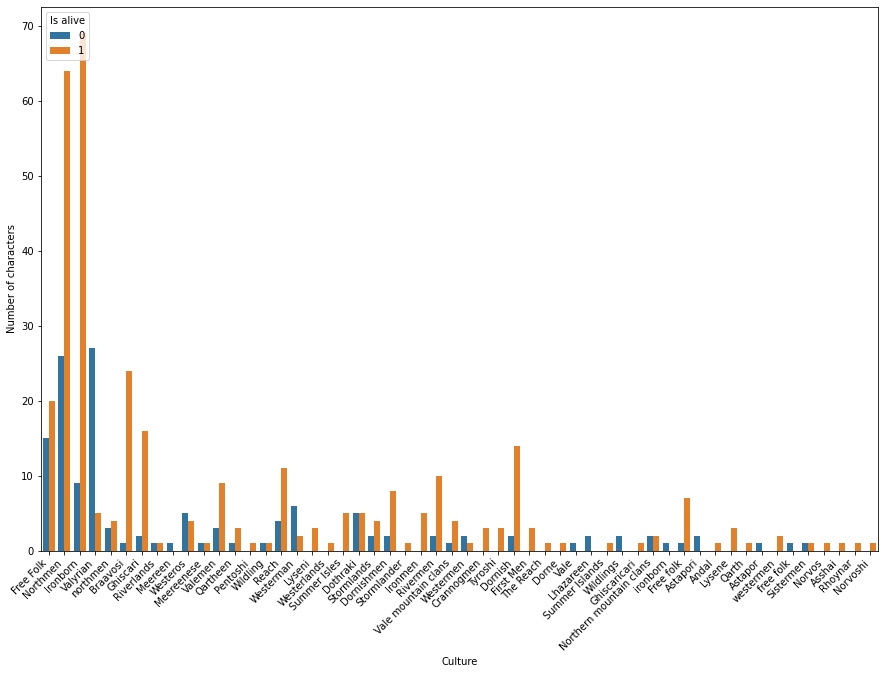

In [5]:
plt.figure(figsize=(15, 10))
fig = sns.countplot(data=df, x='culture', hue='isAlive')
plt.xlabel('Culture')
plt.ylabel('Number of characters')
plt.legend(title='Is alive')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right') #Moim zdaniem lepiej wygląda tak
#plt.xticks(rotation=55)

plt.show()

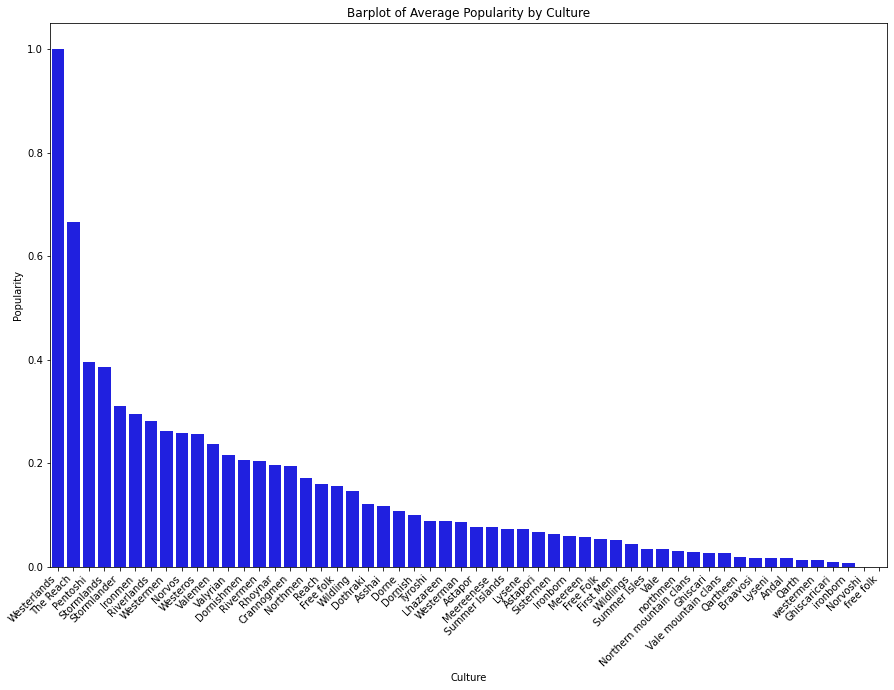

In [7]:
average_popularity = df.groupby('culture')['popularity'].mean().sort_values(ascending=False)
sorted_cultures = average_popularity.index

plt.figure(figsize=(15, 10))
fig = sns.barplot(data=df, x='culture', y='popularity', ci=None, order=sorted_cultures, color="blue") # Lepiej raczej jest ustalić w takiej sytuacji jakiś jeden kolor
plt.xlabel('Culture')
plt.ylabel('Popularity')
plt.title('Barplot of Average Popularity by Culture')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right') #Analogicznie
#plt.xticks(rotation=45)

plt.show()

Moglibyście jeszcze spróbować zrobić jakieś plot patrzące na zależności między dwoma zmiennymi na raz albo nawet większą ich liczbą np:

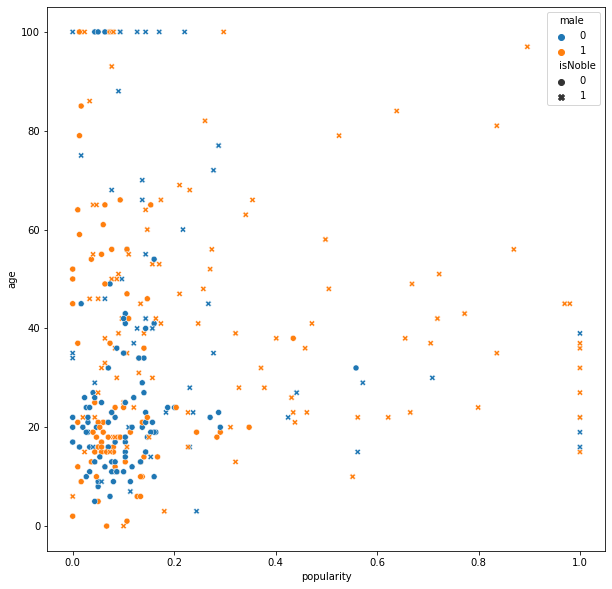

In [22]:
# może być coś sensowniejszego na pewno
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df, x = "popularity", y = "age", hue = "male", style = "isNoble")
plt.show()

In [23]:
# Tego typu ploty opłaca się robić w plotly, daje to możliwość zajrzenia jakie postacie kryją się za daną kropką
# Chociaż korzystanie z tej biblioteki bywa męczące
import plotly.express as px

In [28]:
fig = px.scatter(df, x = "popularity", y = "age", color = df["male"].astype(str), symbol = "isNoble", hover_name = "name")
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    plot_bgcolor='white'
)
fig.show()